https://www.kaggle.com/c/house-prices-advanced-regression-techniques
houseproce

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('houseprice.csv')

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
# null 값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
isnull_series = df.isnull().sum()

In [6]:
isnull_series[isnull_series>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
isnull_series[isnull_series>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

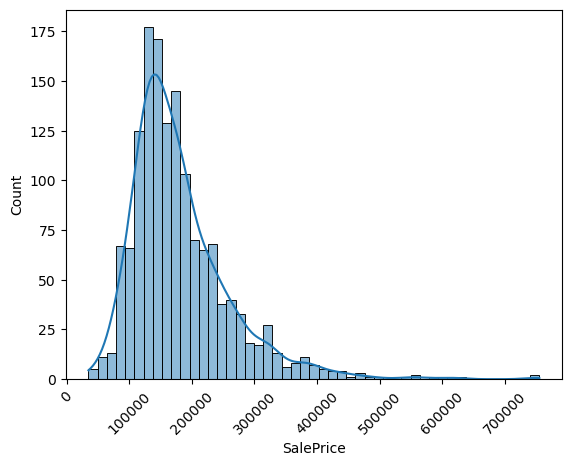

In [8]:
#데이터 분포 확인
plt.xticks(rotation=45)
sns.histplot(df['SalePrice'],kde=True)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

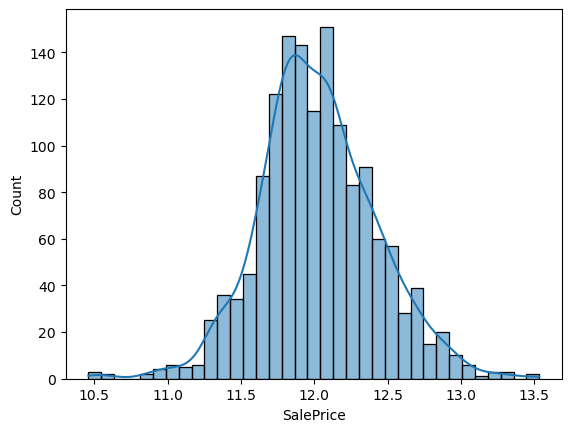

In [9]:
# 로그 스케일
log_saleprice = np.log1p(df['SalePrice'])
sns.histplot(log_saleprice,kde=True)
#expm1()으로 환원가능

In [10]:
# 로그 스케일 적용
original_salprice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

In [11]:
# nan 이 많은 콜럼 drop, nan 값 처리
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Id'],inplace=True)
df.fillna(df.mean(),inplace=True)

In [12]:
null_column_count = df.isnull().sum()[df.isnull().sum()>0]

In [13]:
#자료형 확인
df.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [14]:
# 원핫 인코딩은 판다스와 사이킷 런 api 모두에서 제공한다.
# NaN 값도 같이 처리 된다. (모든 카테고리에 대해 0으로 채워준다.)
df.shape

(1460, 75)

In [15]:
# 원핫 인코딩 적용
df_ohe = pd.get_dummies(df)

In [16]:
df_ohe.shape

(1460, 271)

In [17]:
# rmse 모델 푱가지표 출력 함수
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    import numpy as np
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:,np.round',np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses
    

In [18]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
# lasso l1 회귀 계수를 줄이다 0이 된다.
# Ridge L2 회귀 계수를 0에 가깝게 만든다.
# LinearRegression L1+L2

# 회귀계수 w 값, 각 변수마다 하나씩 존재한다.
from sklearn.model_selection import train_test_split

In [19]:
# 데이터 결과 분리
y = df_ohe['SalePrice']
X = df_ohe.drop(columns = ['SalePrice'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [21]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [22]:

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [23]:
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [24]:
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:,np.round 0.132
Ridge 로그 변환된 RMSE:,np.round 0.128
Lasso 로그 변환된 RMSE:,np.round 0.176


[0.1318957657915454, 0.1275084633405305, 0.17628250556471395]

In [25]:
# 로그 결과 환원
np.expm1(0.13189576579154494)

0.14098938294353924

In [26]:

def get_top_botton_coef(model,n=10):
    coef = pd.Series(model.coef_,index=X.columns)

    return coef

In [27]:
get_top_botton_coef(lr_reg)
# 270여개의 컬럼

MSSubClass              -0.000488
LotFrontage              0.000390
LotArea                  0.000002
OverallQual              0.041866
OverallCond              0.032077
                           ...   
SaleCondition_AdjLand   -0.076029
SaleCondition_Alloca     0.028081
SaleCondition_Family    -0.063272
SaleCondition_Normal    -0.000464
SaleCondition_Partial    0.167346
Length: 270, dtype: float64

In [28]:

def get_top_botton_coef(model,n=10):
    coef = pd.Series(model.coef_,index=X.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low
# 튜플형으로 출력된다.

In [29]:
get_top_botton_coef(lr_reg)

(RoofMatl_Membran    0.528057
 RoofMatl_Metal      0.414453
 RoofMatl_WdShngl    0.345254
 RoofMatl_Roll       0.311983
 RoofStyle_Shed      0.292647
 RoofMatl_CompShg    0.273884
 GarageQual_Ex       0.261599
 Condition2_RRNn     0.260054
 RoofMatl_WdShake    0.256344
 RoofMatl_Tar&Grv    0.242292
 dtype: float64,
 Neighborhood_MeadowV   -0.228006
 Condition2_RRAe        -0.243308
 Electrical_FuseP       -0.258129
 Heating_Grav           -0.264520
 GarageCond_Ex          -0.265441
 Electrical_Mix         -0.300984
 MSZoning_C (all)       -0.323040
 Functional_Maj2        -0.426389
 Condition2_PosN        -0.663744
 RoofMatl_ClyTile       -2.372268
 dtype: float64)

In [30]:
# 모델별 회귀 계수
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows = 1 , ncols=3)
    fig.tight_layout()
    
    for i_num,model in enumerate(models):
        coef_high, coef_low = get_top_botton_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__+ ' Coefficient',size = 25)
        axs[i_num].tick_params(axis='y', direction='in',pad= -120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
            
        sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])
        
        

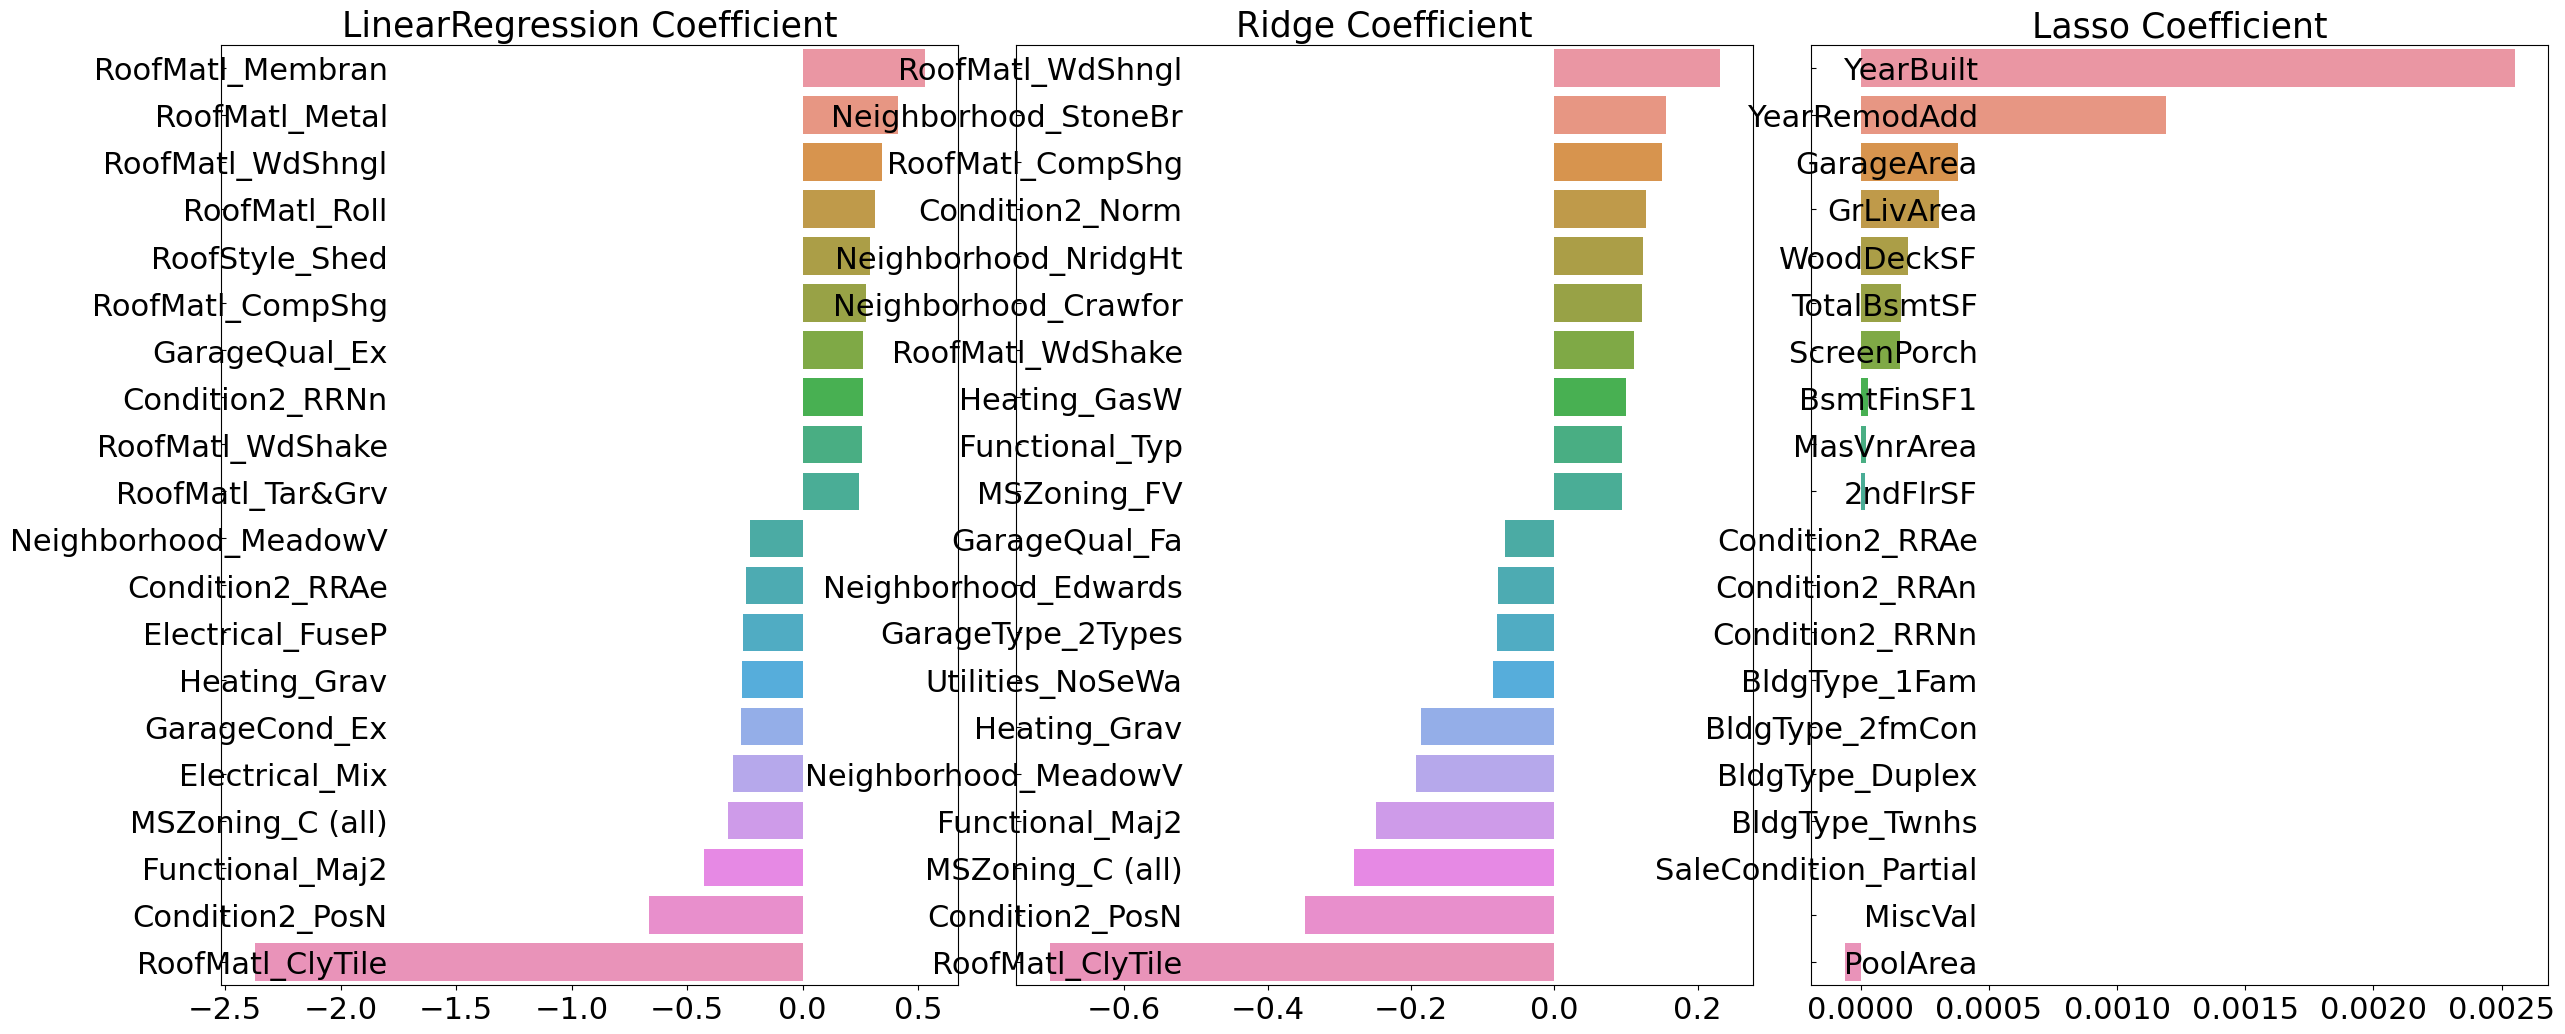

In [31]:
visualize_coefficient(models)

In [32]:
# lasso 의 경우 다른 두개의 모델과 다른 모습을 띄고 있다
# 데이터에 문제가 있는지 교차 검증을 해야 한다.
# 교과서 384 page
# 별 차이 없음

# 알파값 
# 교과서 385 page
# 

# 피쳐 데이터 세트의 분포
# 이상치를 존재 여부 확인

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
# 교차검증
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

In [35]:
get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.135 0.165 0.168 0.111 0.198]
LinearRegression cv 평균 rmse 값 : 0.155
Ridge cv rmse 값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge cv 평균 rmse 값 : 0.144
Lasso cv rmse 값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso cv 평균 rmse 값 : 0.198


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# GridSearchCV
def print_best_params(model,params):
    grid_model = GridSearchCV(model, params, scoring = 'neg_mean_squared_error',cv = 5)
    # 별표 이후 순서대로???
    
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse,4)}, 최적 alpha값:{grid_model.best_params_}')
    

In [38]:
ridge_param = {
    'alpha': [0.05,0.1,1,5,8,10,12,15,20]
}

print_best_params(ridge_reg,ridge_param)


Ridge 5 cv시 최적 평균 rmse 값:0.1418, 최적 alpha값:{'alpha': 12}


In [39]:
lasso_param = {
    'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]

}
print_best_params(lasso_reg,lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.142, 최적 alpha값:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:,np.round 0.132
Ridge 로그 변환된 RMSE:,np.round 0.124
Lasso 로그 변환된 RMSE:,np.round 0.12


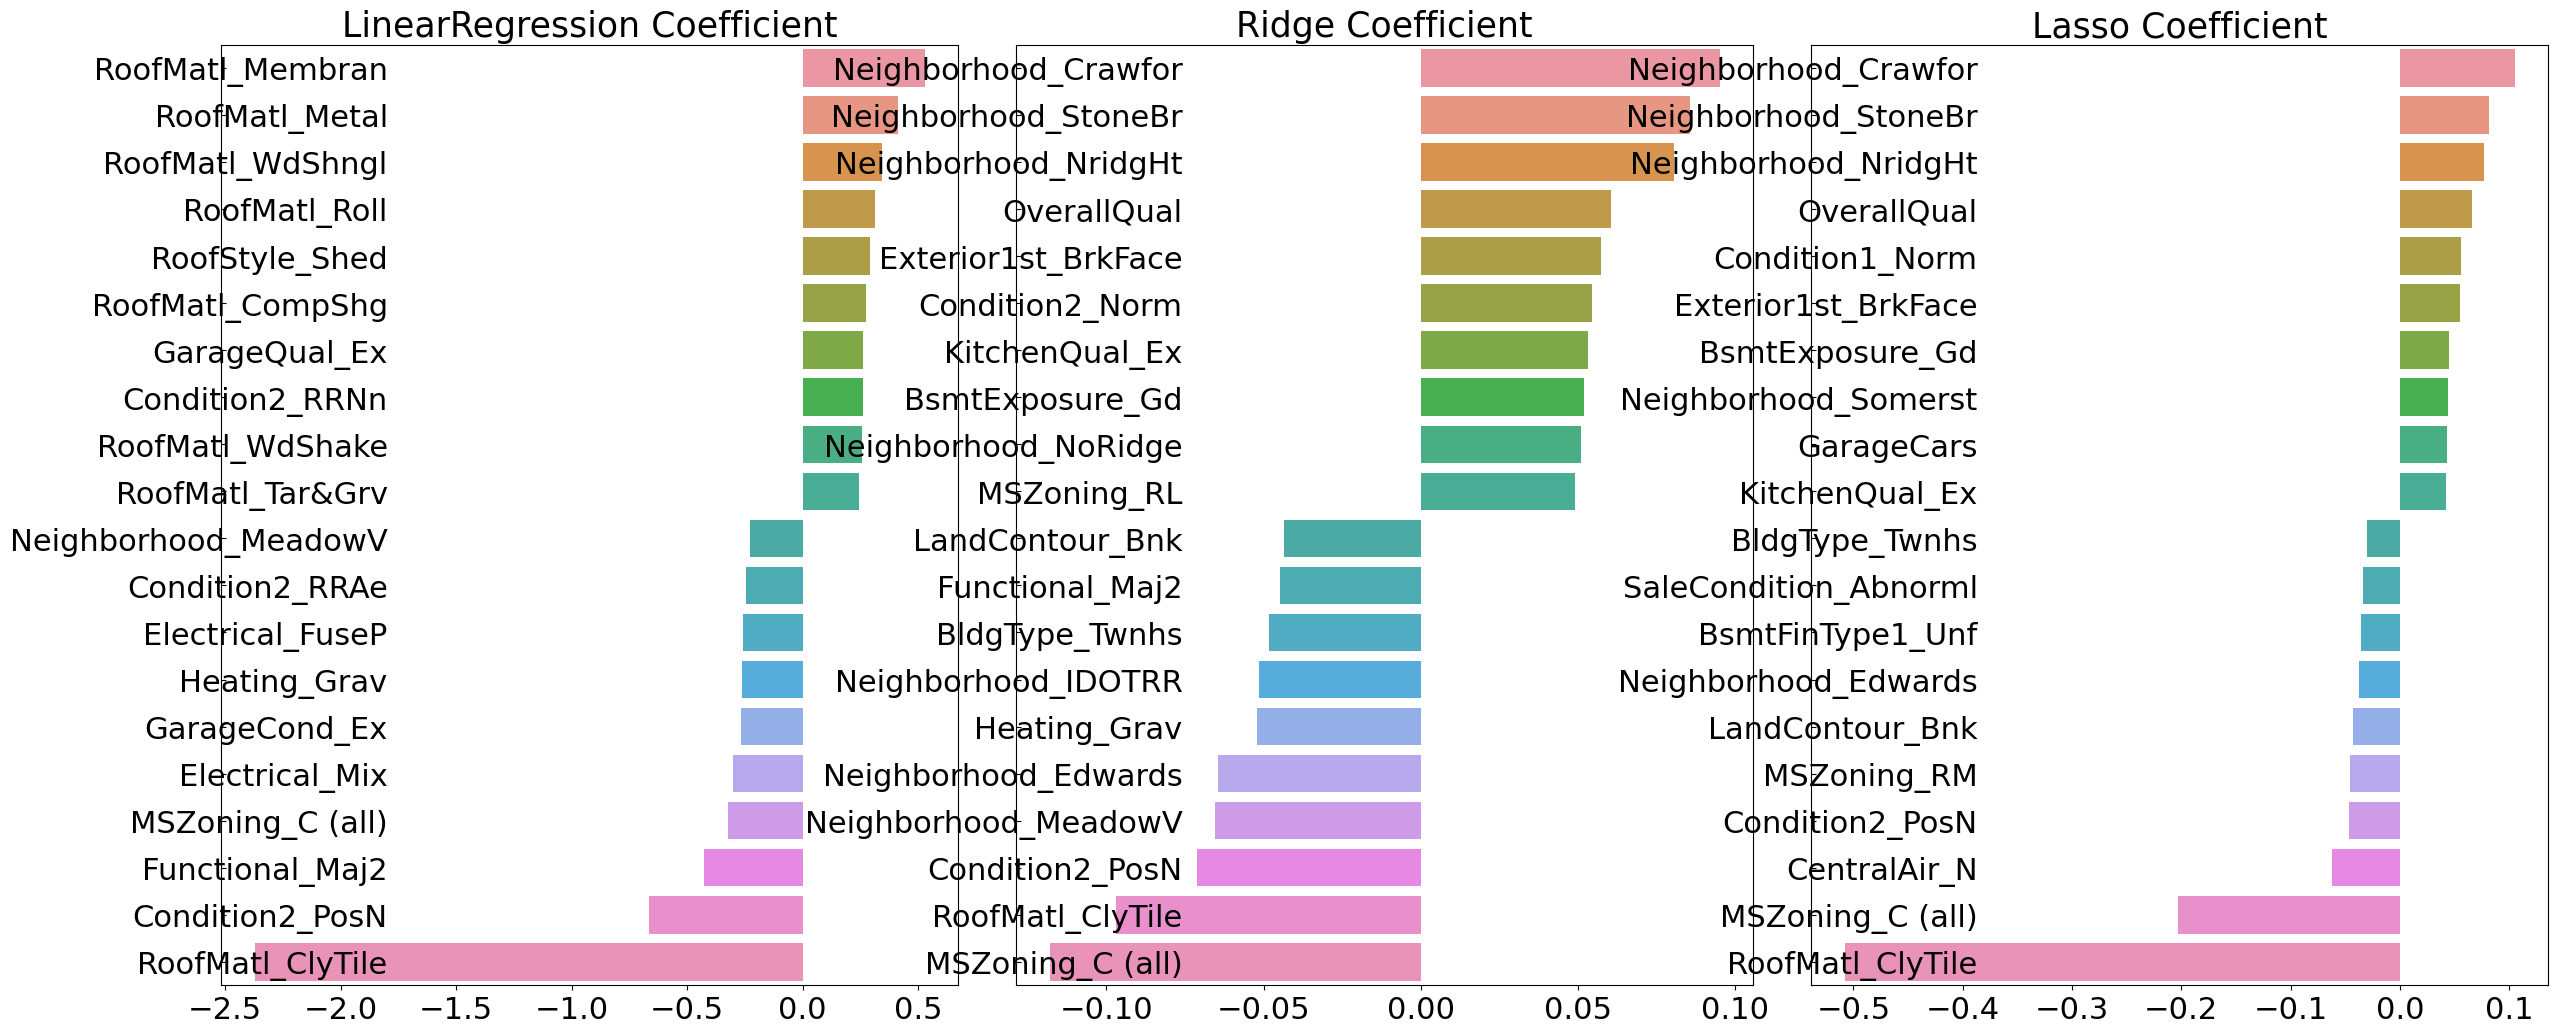

In [40]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha = 12)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
visualize_coefficient(models)

In [41]:
# 라쏘의 경우 알파값 조정을 통해 회귀계수가 살아났다.

In [42]:
# 이후 이상치 처리 후 재시도

In [43]:
from scipy.stats import skew

In [44]:
# 원핫 인코딩의 0,1 은 상관하지 않아도 된다, 기존의 수치값만 고려한다.
feature_index = df.dtypes[df.dtypes != 'object'].index

In [45]:
skew_features = df[feature_index].apply(lambda x : skew(x))
# 비대칭 정도를 확인하기 위한 컬럼

In [46]:
skew_features_top = skew_features[skew_features>1]

In [47]:
skew_features_top.sort_values(ascending=False)
# 심한 값 들만 정리

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

In [48]:
np.log1p(df[skew_features_top.index])

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.000000,6.753438,6.753438,0.0,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.000000,7.141245,7.141245,0.0,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.000000,6.825460,6.825460,0.0,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.000000,6.629363,6.869014,0.0,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.000000,7.044033,7.044033,0.0,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,0.000000,0.000000,0.000000,6.860664,6.860664,0.0,7.407318,0.000000,0.693147,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,4.454347,9.486152,4.787492,6.673298,5.099866,7.341484,7.637234,0.0,7.637234,0.000000,0.693147,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.262680,4.204693,9.109746,0.000000,5.620401,0.000000,7.050123,7.080868,0.0,7.758333,0.000000,0.693147,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446
1458,3.044522,4.234107,9.181735,0.000000,3.912023,6.937314,6.983790,6.983790,0.0,6.983790,0.000000,0.693147,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000


In [49]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [50]:
df_ohe = pd.get_dummies(df)
y = df_ohe['SalePrice']
X = df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

ridge_param = {
    'alpha': [0.05,0.1,1,5,8,10,12,15,20]
}

print_best_params(ridge_reg,ridge_param)
lasso_param = {
    'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]

}
print_best_params(lasso_reg,lasso_param)


Ridge 5 cv시 최적 평균 rmse 값:0.1275, 최적 alpha값:{'alpha': 10}
Lasso 5 cv시 최적 평균 rmse 값:0.1252, 최적 alpha값:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:,np.round 0.128
Ridge 로그 변환된 RMSE:,np.round 0.122
Lasso 로그 변환된 RMSE:,np.round 0.119


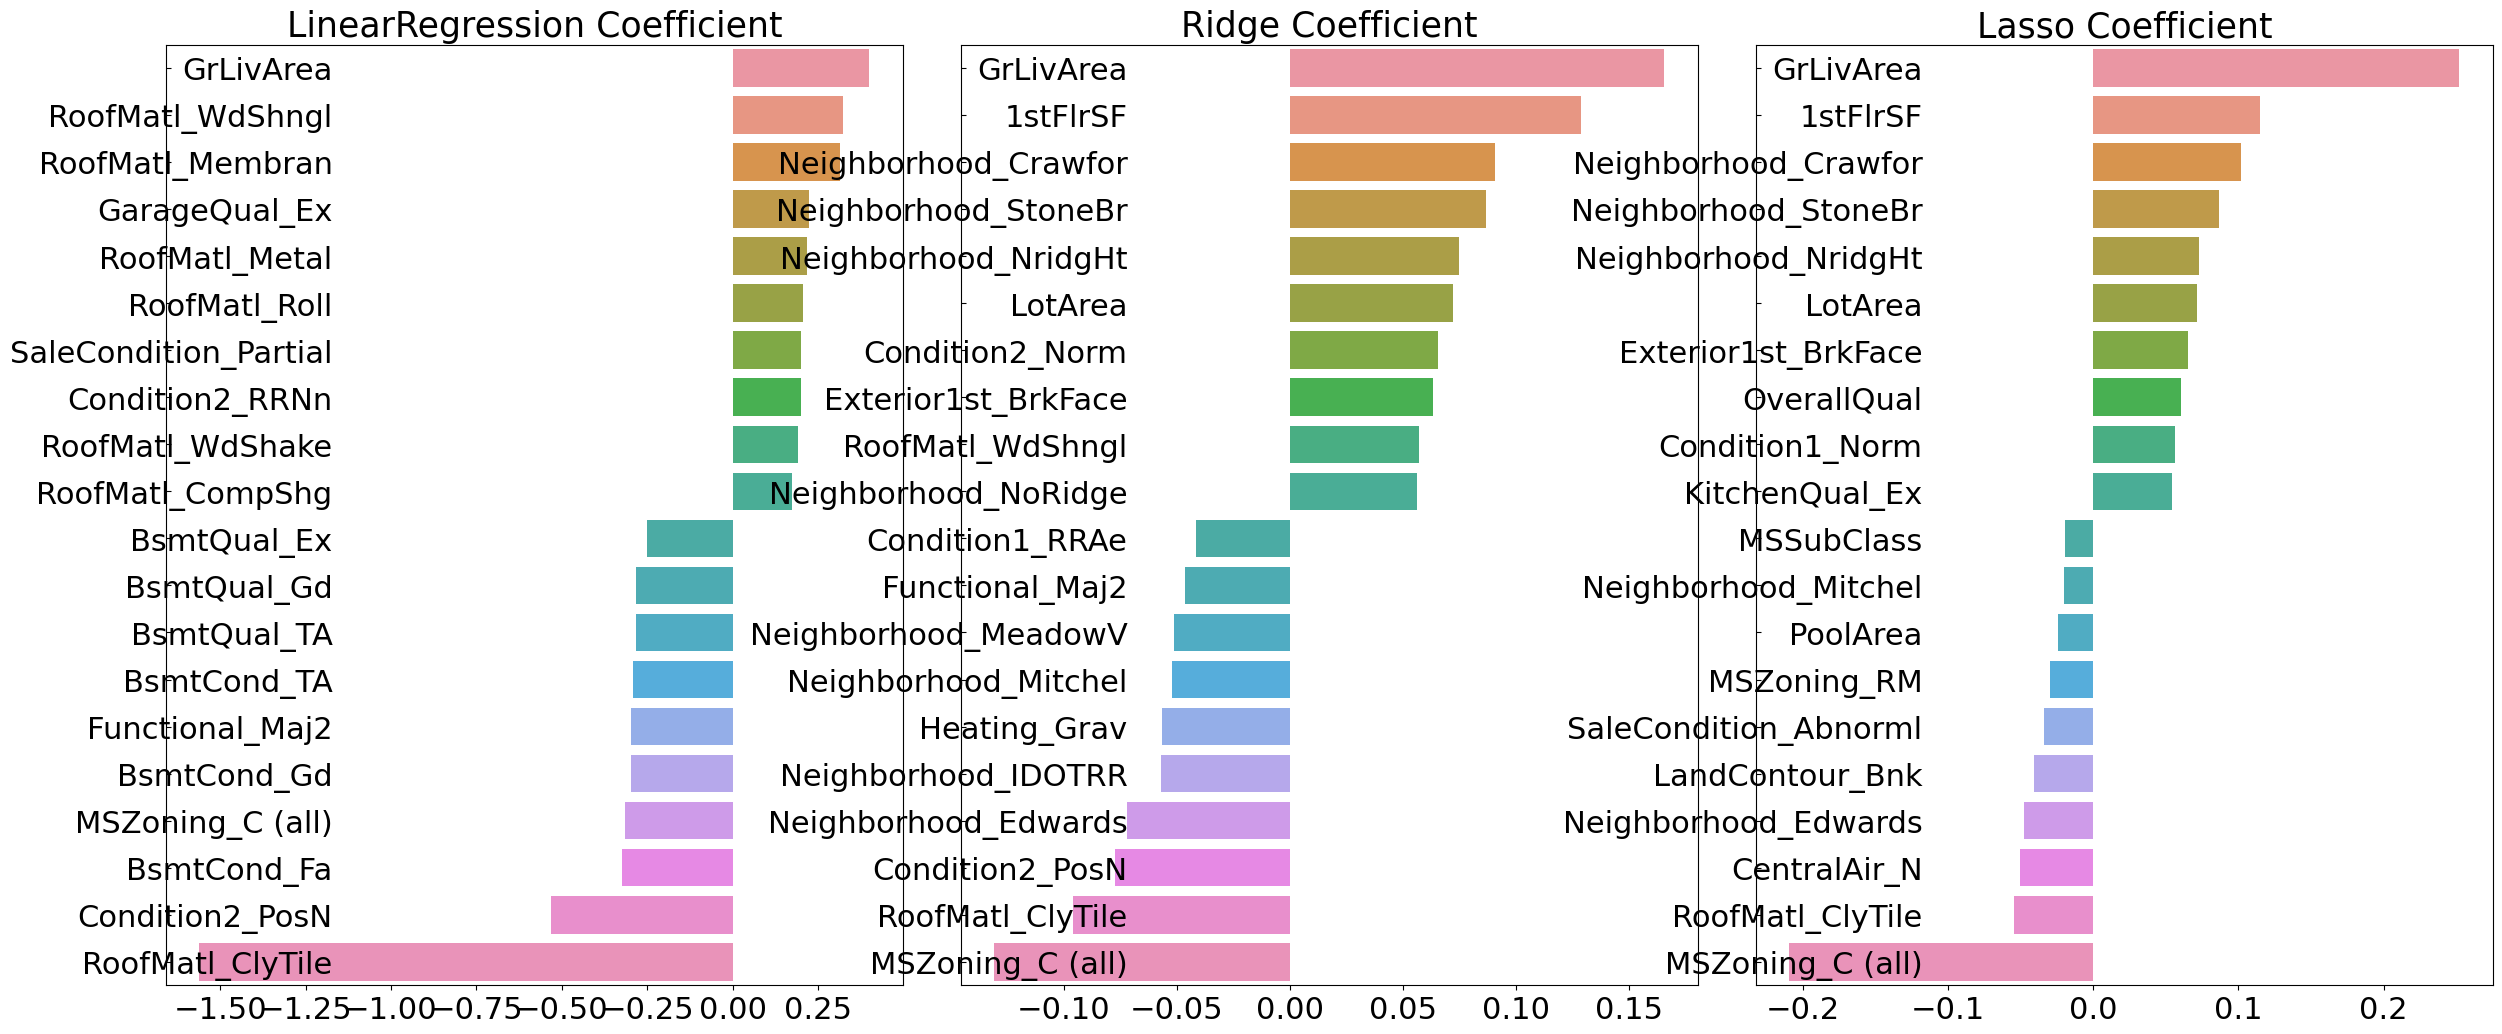

In [51]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
visualize_coefficient(models)

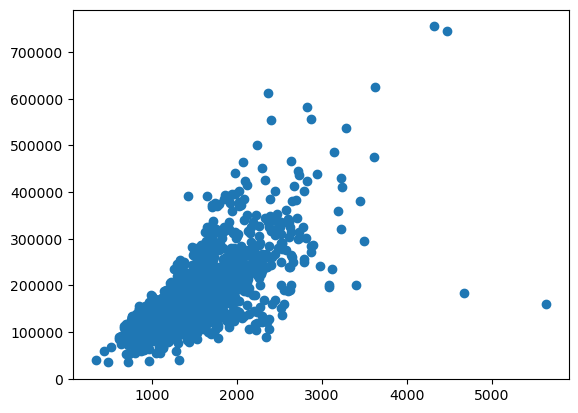

In [52]:
df_org = pd.read_csv('houseprice.csv')
plt.scatter(x= df_org['GrLivArea'],y=df_org['SalePrice'])

In [53]:
# x축 4000, y축 500000 외 값 제외

In [54]:
cond1 = df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = df_ohe[cond1 & cond2].index

In [55]:
df_ohe.shape

(1460, 271)

In [56]:
df_ohe.drop(index = outlier_index, inplace = True)

In [57]:
df_ohe.shape

(1458, 271)

In [58]:
df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [59]:

y = df_ohe['SalePrice']
X = df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

ridge_param = {
    'alpha': [0.05,0.1,1,5,8,10,12,15,20]
}

print_best_params(ridge_reg,ridge_param)
lasso_param = {
    'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]

}
print_best_params(lasso_reg,lasso_param)


Ridge 5 cv시 최적 평균 rmse 값:0.1125, 최적 alpha값:{'alpha': 8}
Lasso 5 cv시 최적 평균 rmse 값:0.1122, 최적 alpha값:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:,np.round 0.129
Ridge 로그 변환된 RMSE:,np.round 0.105
Lasso 로그 변환된 RMSE:,np.round 0.1


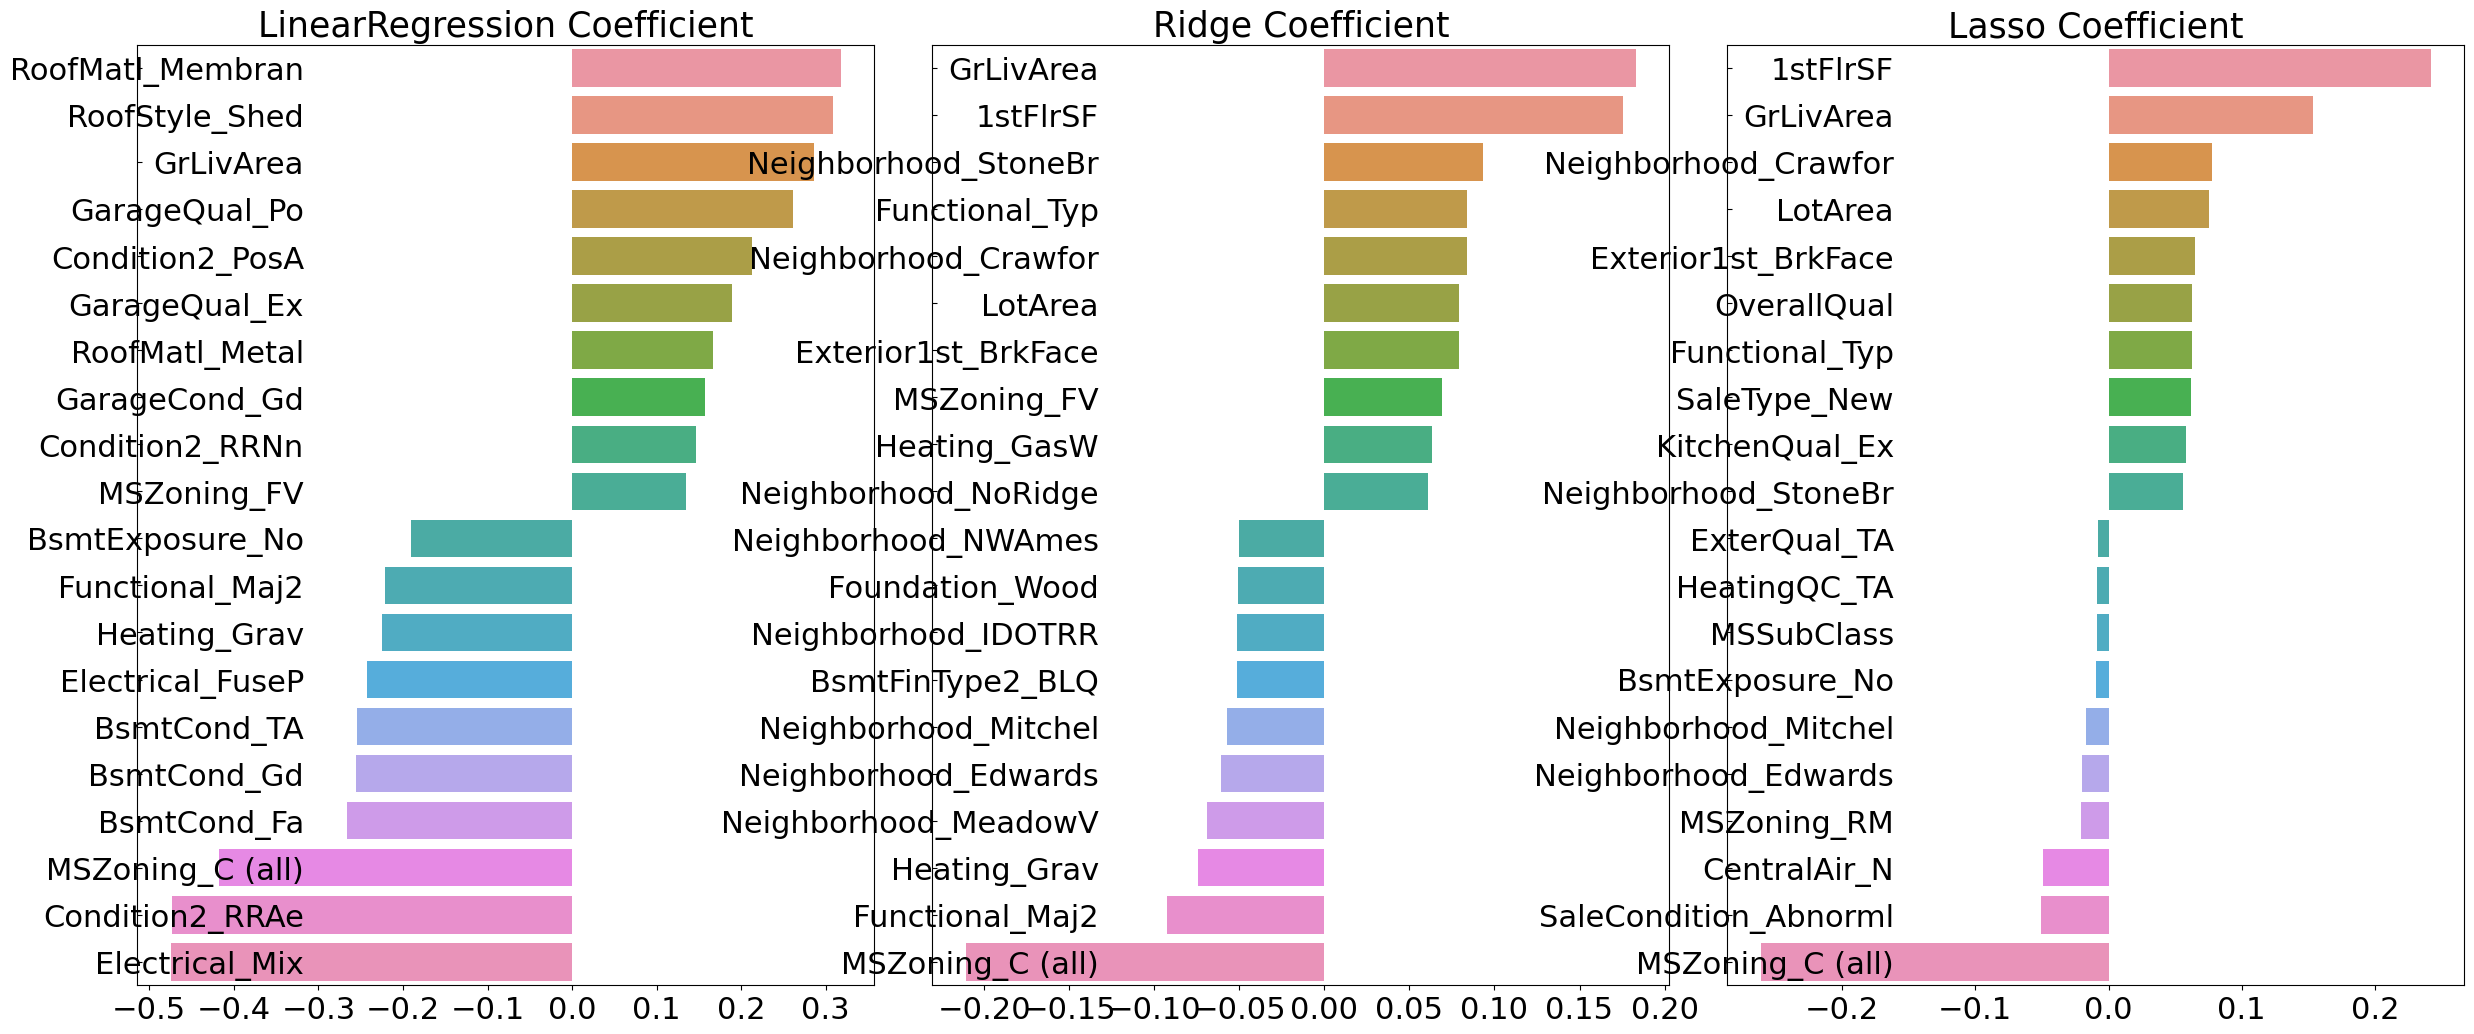

In [60]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
visualize_coefficient(models)